In [ ]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [ ]:
import os
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !rm -r /content/runs

In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rE192HmD2H2lJJ4SZOxD")
project = rf.workspace("thesis-q0sbh").project("daily_accessories")
version = project.version(8)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.15, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to /content/datasets/Daily_accessories-8 in yolov8:: 100%|██████████| 1084/1084 [00:00<00:00, 7678.71it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=50 imgsz=416

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/Daily_accessories-8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25857130 parameters, 0 gradients, 78.8 GFLOPs
val: Scanning /content/datasets/Daily_accessories-8/valid/labels.cache... 106 images, 0 backgrounds, 0 corrupt: 100% 106/106 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:05<00:00,  1.17it/s]
                   all        106        115      0.729      0.787       0.86      0.831
                   bag        106          1      0.768          1      0.995      0.995
              biscuits        106          6      0.477      0.667      0.766      0.703
                  cake        106          3      0.348      0.667      0.775      0.775
                  caps        106          4      0.886          1      0.995      0.958
                 chips        106          3          1      0.849      0.995      0.995
            chocolates        10

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25857130 parameters, 0 gradients, 78.8 GFLOPs

image 1/54 /content/datasets/Daily_accessories-8/test/images/34_jpeg.rf.35dfa8d774afd6ea55ac1d2fff1cfaf3.jpg: 416x416 1 caps, 22.5ms
image 2/54 /content/datasets/Daily_accessories-8/test/images/57_jpg.rf.54cec3411e022e82d3aa907a284e3ec7.jpg: 416x416 1 t-shirt, 22.5ms
image 3/54 /content/datasets/Daily_accessories-8/test/images/6-cg-557-6-campus-red-blu-original-imagy6rqs6yjeadx_jpeg.rf.93ac97c4dd8fbfd348094f796e2ee000.jpg: 416x416 (no detections), 22.4ms
image 4/54 /content/datasets/Daily_accessories-8/test/images/65_jpg.rf.1afc49ce7800acbb30333b245e9dbea4.jpg: 416x416 1 bag, 22.3ms
image 5/54 /content/datasets/Daily_accessories-8/test/images/GUEST_aaf2291d-752f-4d16-9343-c11afb94c26d_jpeg.rf.5fb6526349ed3bbd4cc19e027edcd91a.jpg: 416x416 3 deodorants, 22.3ms
image 6/54 /content/datasets/Daily_accessories-8/test/images/a

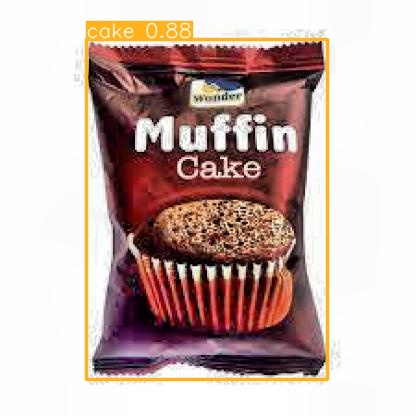

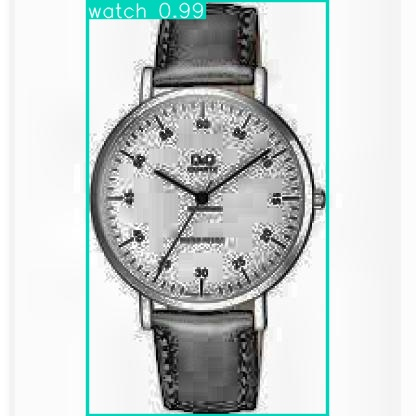

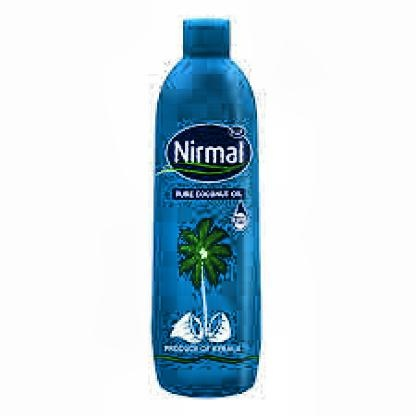

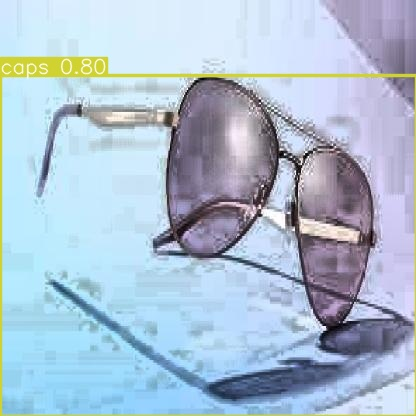

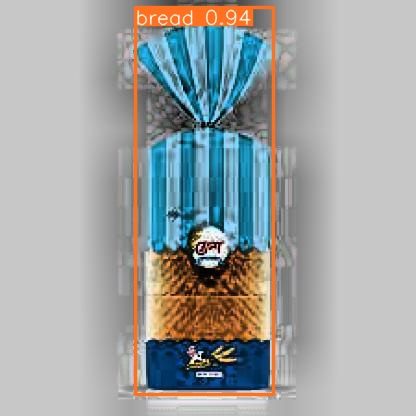

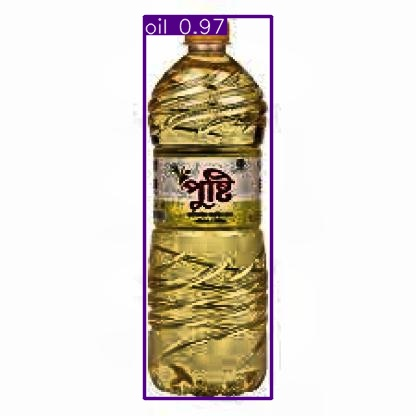

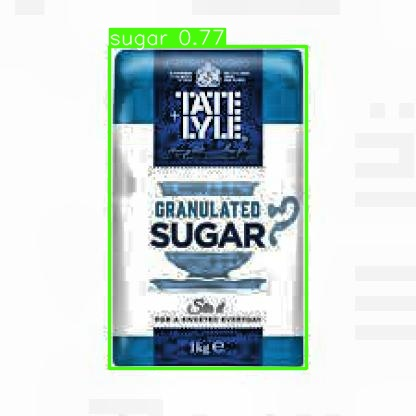

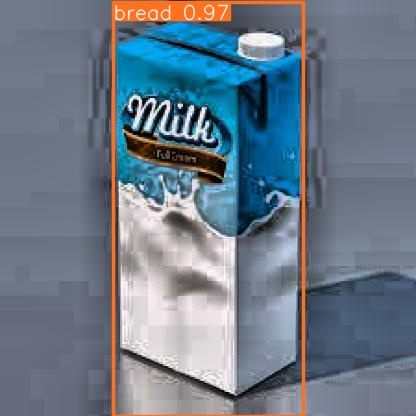

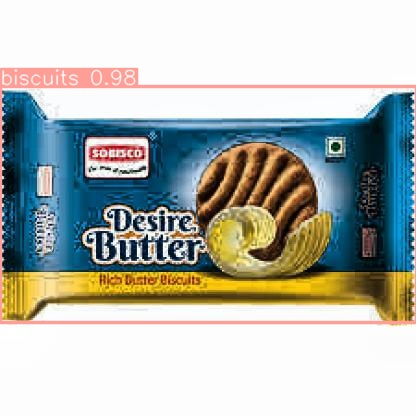

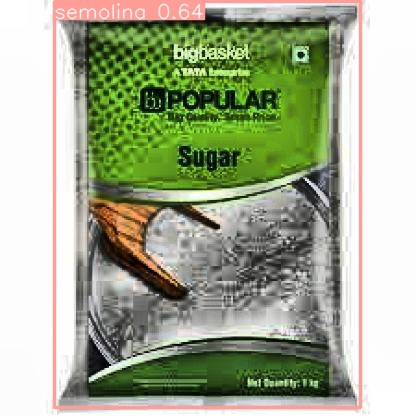

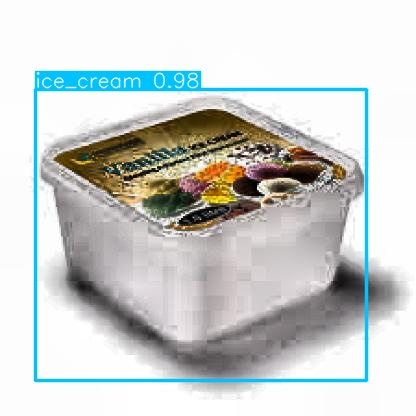

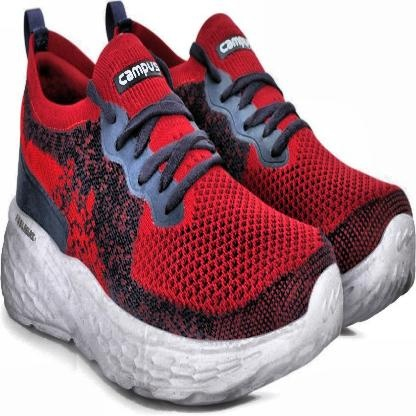

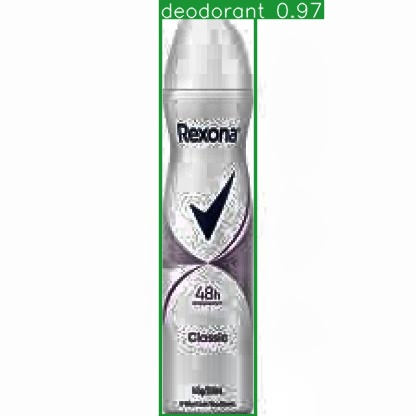

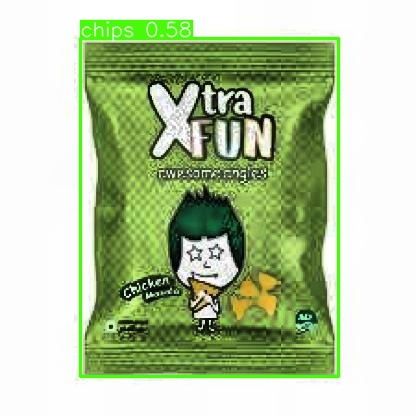

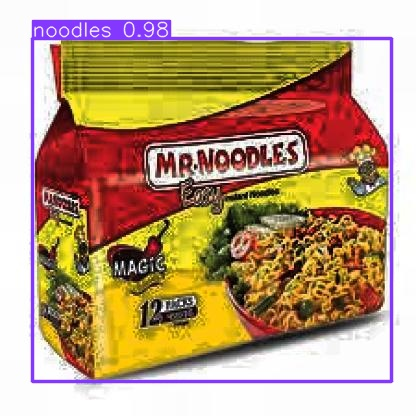

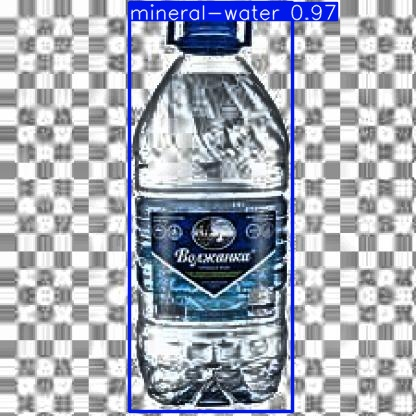

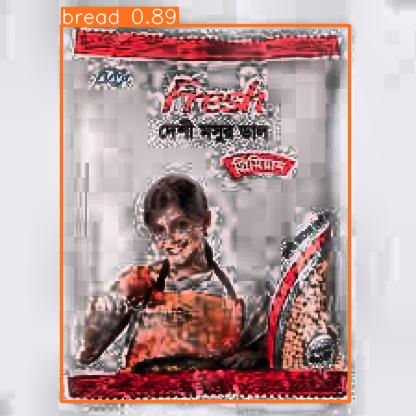

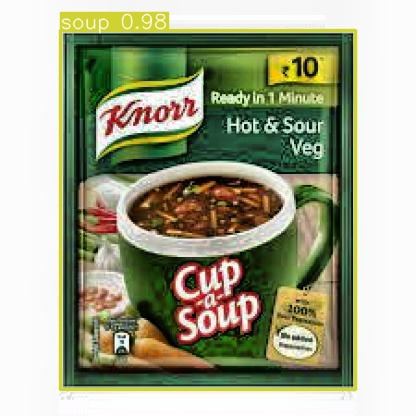

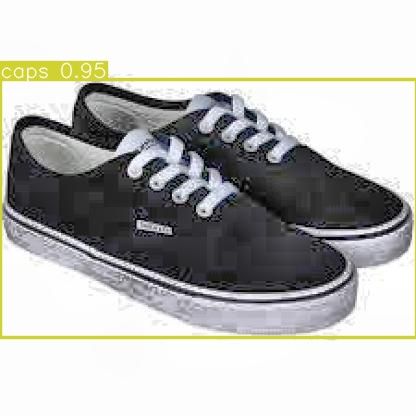

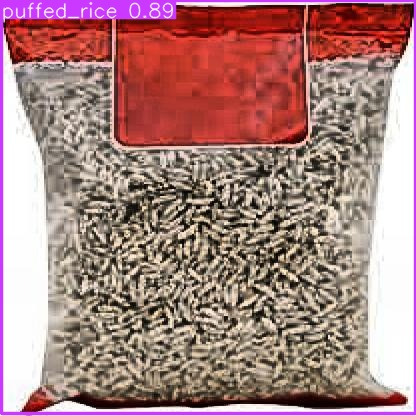

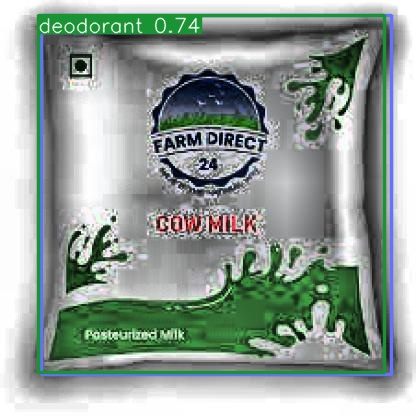

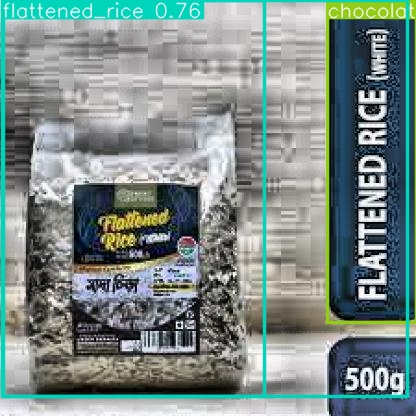

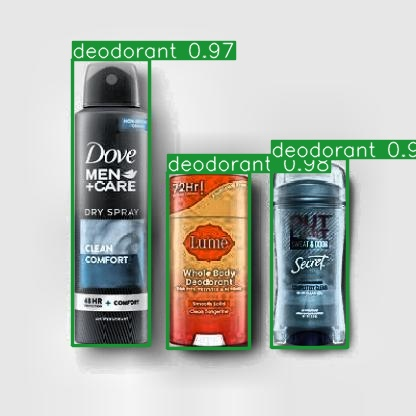

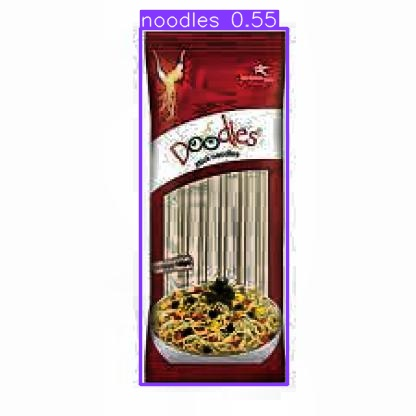

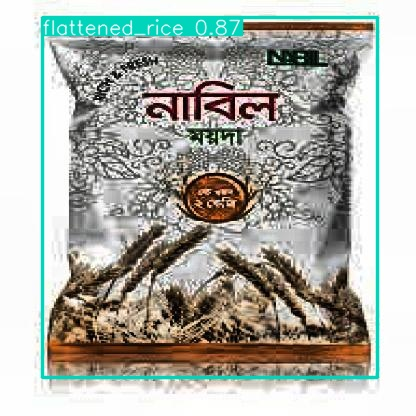

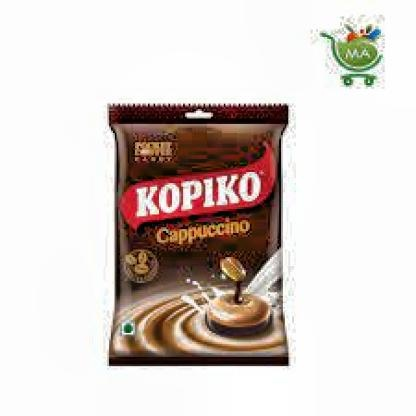

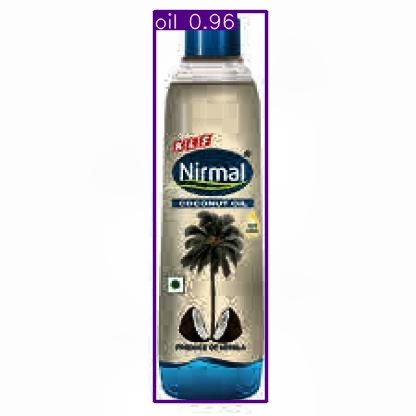

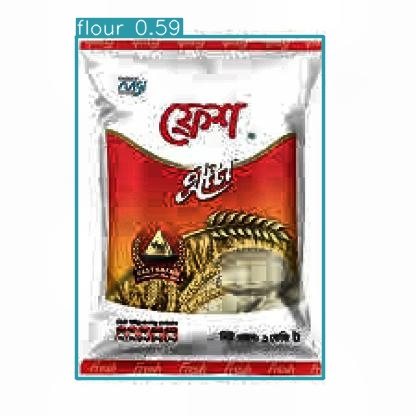

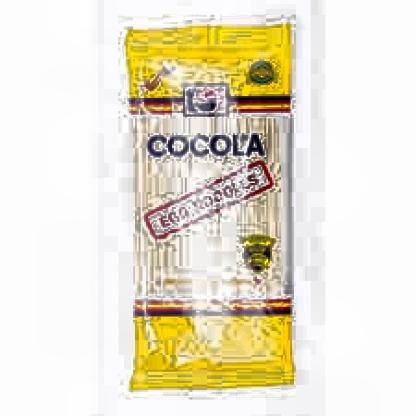

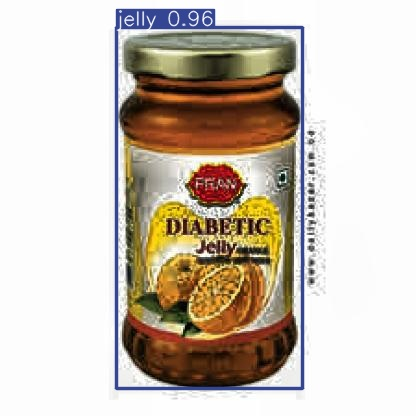

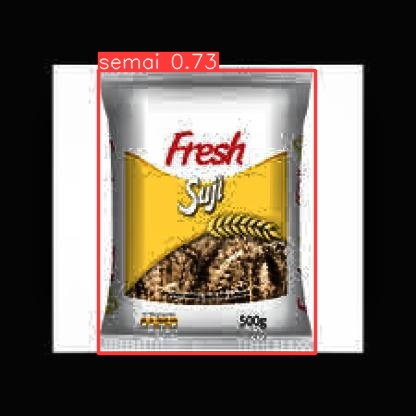

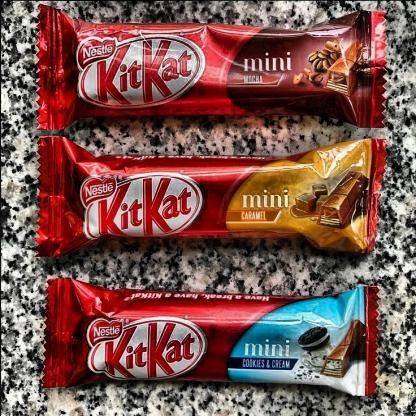

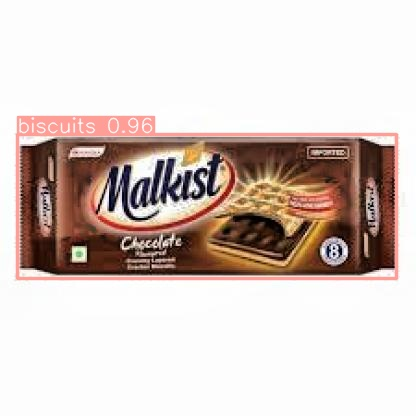

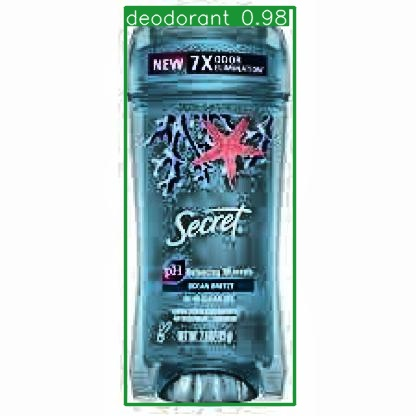

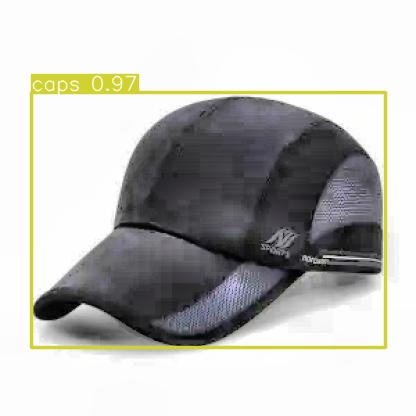

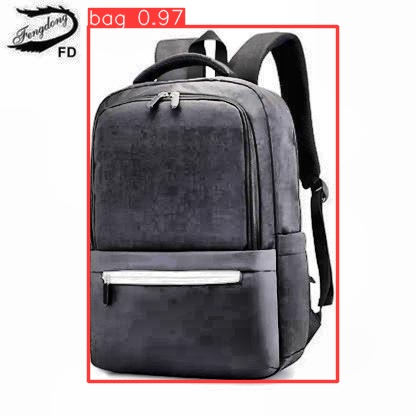

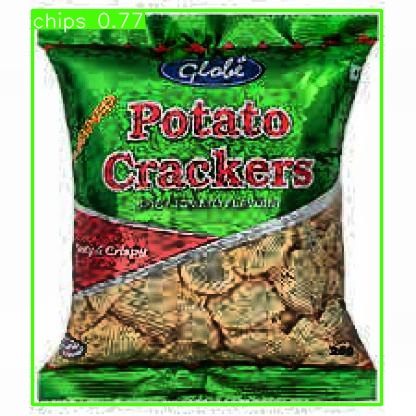

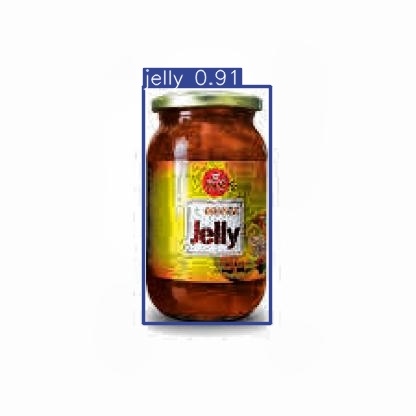

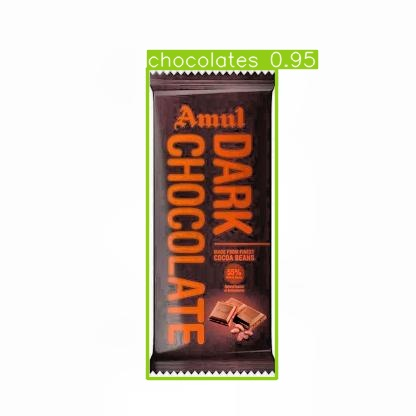

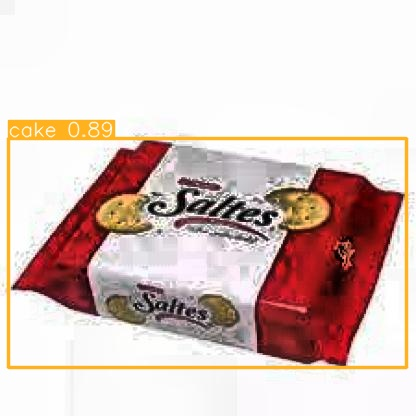

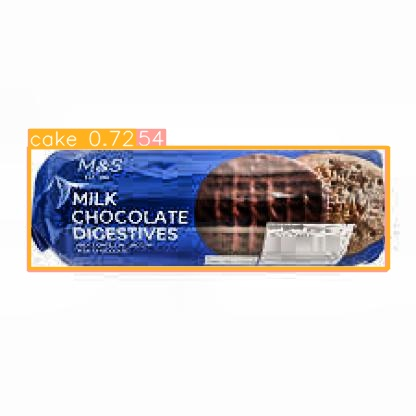

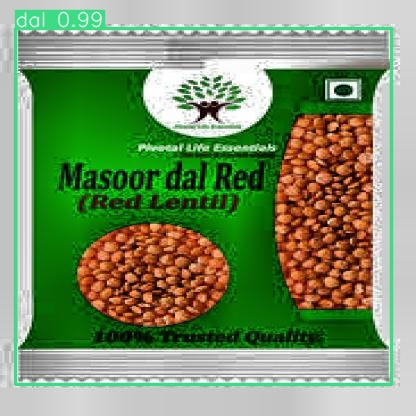

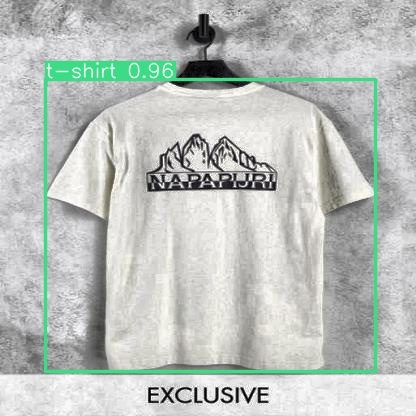

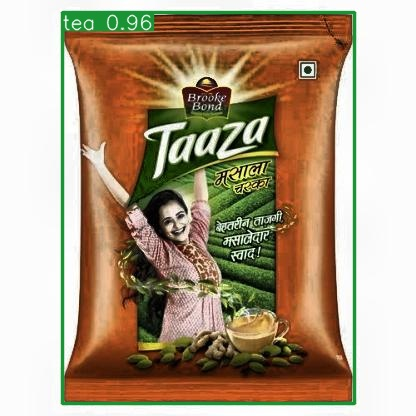

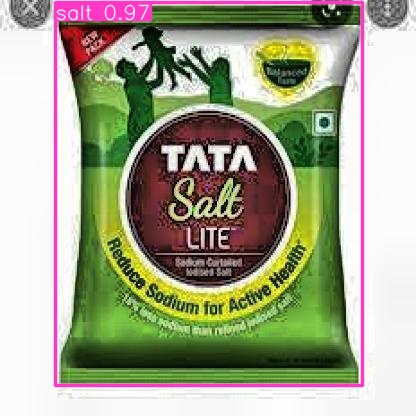

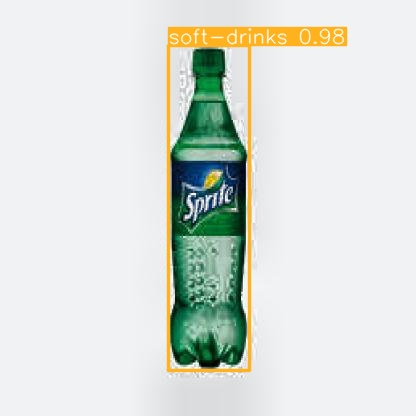

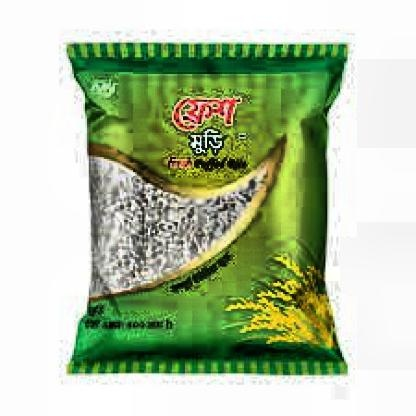

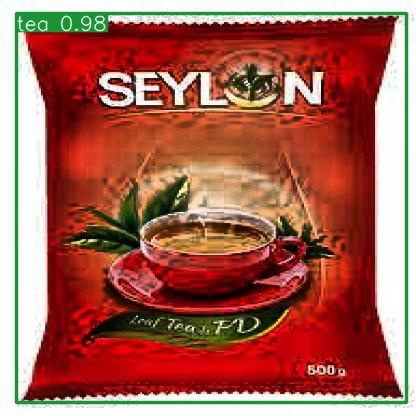

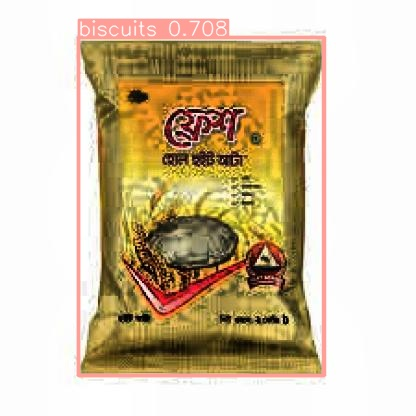

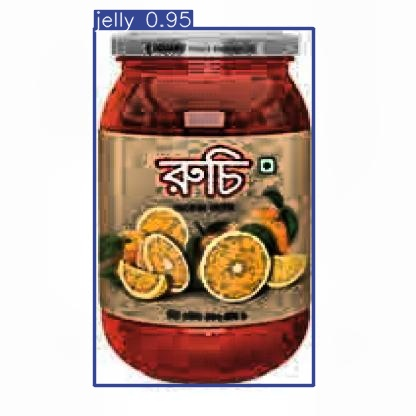

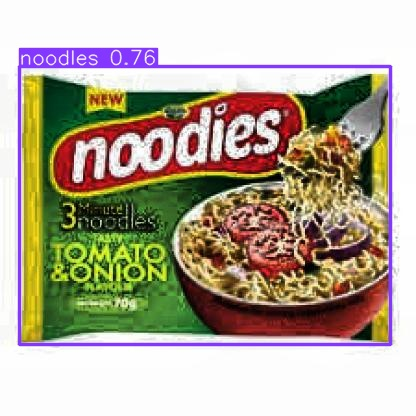

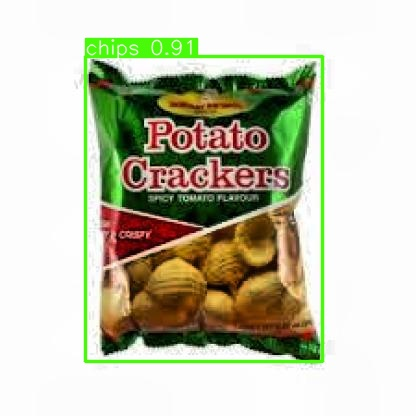

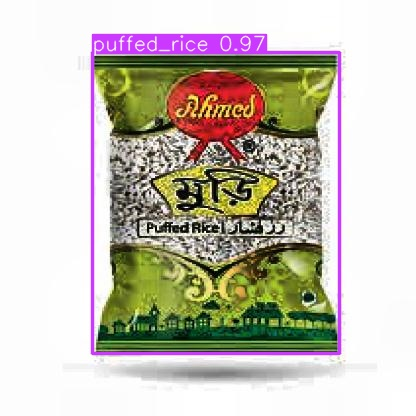

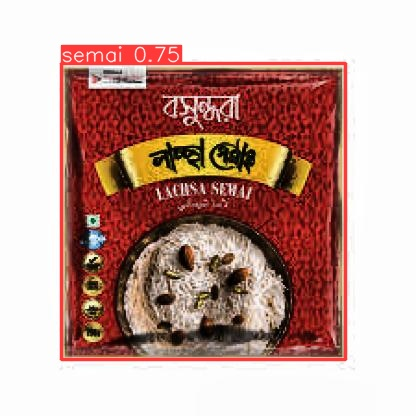

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")